The Blood-brain barrier penetration (BBBP)
--------------------------------------------------------------

### All libraries we need

In [1]:
import os
import os.path as osp
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import torch
import torch.nn as nn
from torch.optim import Adam

#********************************************************#
'''
load_dataset contain lots of functions for loading several datasets and 
also there is a function as name get_ dataloader for generating a
dictionary of training, validation, and testing dataLoader.
'''
from load_dataset import get_dataset, get_dataloader

#********************************************************#
'''
As we need several arguments for training process, we store all argument in configure file. 
For using this file, you need the library'Typed Argument Parser (Tap). So you need 'pip install typed-argument-parser'. 
'''
from Configures import data_args, train_args, model_args

### start loading data

In [2]:
print(data_args.dataset_name)
print(data_args.dataset_dir)



bbbp
/datasets


In [4]:
dataset = get_dataset(data_args.dataset_dir, data_args.dataset_name)
input_dim = dataset.num_node_features
output_dim = int(dataset.num_classes)


print(input_dim)
print(output_dim)

9
2


In [ ]:
edge_index.numpy().size> 0

In [11]:
print(dataset[59].edge_index.numpy())
dataset[59].edge_index.numpy().size==0

[]


True

### Data Analysis

In [7]:
avg_nodes = 0.0
avg_edge_index = 0.0
for i in range(len(dataset)):
    avg_nodes += dataset[i].x.shape[0]
    avg_edge_index += dataset[i].edge_index.shape[1]
avg_nodes /= len(dataset)
avg_edge_index /= len(dataset)
print(f"graphs {len(dataset)}, avg_nodes{avg_nodes :.4f}, avg_edge_index_{avg_edge_index/2 :.4f}")

best_acc = 0.0
data_size = len(dataset)
print(f'The total num of dataset is {data_size}')



graphs 2050, avg_nodes23.9356, avg_edge_index_25.8151
The total num of dataset is 2050


In [8]:


# Read the CSV file
df = pd.read_csv('datasets/bbbp/raw/BBBP.csv')

# Print the shape of the dataset
print("The shape of the dataset is:", df.shape)

# Print the columns of the dataset
print("The columns of the dataset are:", df.columns)

# Print the summary statistics of the dataset
print("The summary statistics of the dataset are:")
print(df.describe())

# Print some sample rows of the dataset
print("Some sample rows of the dataset are:")
df.head(5)

The shape of the dataset is: (2050, 4)
The columns of the dataset are: Index(['num', 'name', 'p_np', 'smiles'], dtype='object')
The summary statistics of the dataset are:
               num         p_np
count  2050.000000  2050.000000
mean   1027.376098     0.764390
std     592.836849     0.424483
min       1.000000     0.000000
25%     514.250000     1.000000
50%    1026.500000     1.000000
75%    1540.750000     1.000000
max    2053.000000     1.000000
Some sample rows of the dataset are:


,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


In [24]:
df["smiles"][59:65]

59           O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3
60    [Cl-].CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c3cccc...
61             c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC
62    CC[C@]1(O)C[C@H]2CN(CCc3c([nH]c4ccccc34)[C@@](...
63       CCC(NC(=O)c1c(c(nc2c1cccc2)c1ccccc1)C)c1ccccc1
64    ClC1=CC=CC(OC2CCN(CCC3CCCN3S(C4=CC(N([H])C=C5)...
Name: smiles, dtype: object

### Visualizing

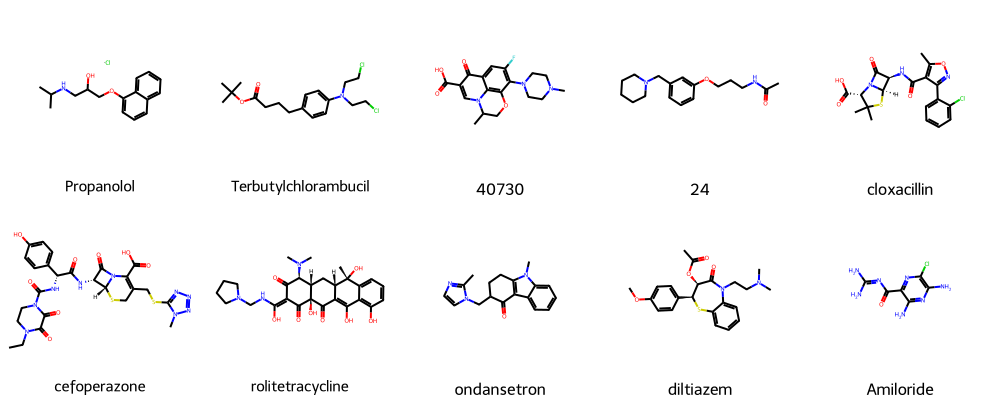

In [12]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

# Read the CSV file
df = pd.read_csv('datasets/bbbp/raw/BBBP.csv')

# Extract the SMILES strings and names of the first 10 compounds
smiles_list = df["smiles"][:10].tolist()
name_list = df["name"][:10].tolist()

# Convert the SMILES strings into RDKit molecule objects
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Create a grid image with 2 rows and 5 columns and put the names as legends
img = Draw.MolsToGridImage(mol_list, molsPerRow=5, legends=name_list)
img

### Preprocessing and cleaning dataset

In [31]:
#cleaned_dataset = [graph for graph in dataset if graph.edge_index.numpy()!=[]]
cleaned_dataset = [graph for graph in dataset if graph.edge_index.numpy().size> 0]
cleaned_dataset_len=len(cleaned_dataset)
print(f'The number of graphs after cleaning dataset is: {cleaned_dataset_len}')

The number of graphs after cleaning dataset is: 2039


In [32]:
dataloader=get_dataloader(cleaned_dataset, batch_size=train_args.batch_size, random_split_flag=True, data_split_ratio=[0.8, 0.1, 0.1], seed=2)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


### Traninig Process

In [25]:
model_args.model_name.lower()

'gcn'

In [26]:
from GCN import GCNNet

def get_model(input_dim, output_dim, model_args):
    if model_args.model_name.lower() == 'gcn':
        return GCNNet(input_dim, output_dim, model_args)
    elif model_args.model_name.lower() == 'gat':
        return GATNet(input_dim, output_dim, model_args)
    elif model_args.model_name.lower() == 'gin':
        return GINNet(input_dim, output_dim, model_args)
    else:
        raise NotImplementedError
        


class GnnBase(nn.Module):
    def __init__(self):
        super(GnnBase, self).__init__()

    def forward(self, data):
        data = data.to(self.device)
        logits, prob, emb = self.model(data)
        return logits, prob, emb

    def update_state_dict(self, state_dict):
        original_state_dict = self.state_dict()
        loaded_state_dict = dict()
        for k, v in state_dict.items():
            if k in original_state_dict.keys():
                loaded_state_dict[k] = v
        self.load_state_dict(loaded_state_dict)

    def to_device(self):
        self.to(self.device)

    def save_state_dict(self):
        pass


class GnnNets(GnnBase):
    def __init__(self, input_dim, output_dim, model_args):
        super(GnnNets, self).__init__()
        self.model = get_model(input_dim, output_dim, model_args)
        self.device = model_args.device

    def forward(self, data):
        data = data.to(self.device)
        logits, prob, emb = self.model(data)
        return logits, prob, emb



In [27]:
gnnNets = GnnNets(input_dim, output_dim, model_args)
gnnNets.to_device()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(gnnNets.parameters(), lr=train_args.learning_rate, weight_decay=train_args.weight_decay)

In [28]:
def evaluate_GC(eval_dataloader, gnnNets, criterion):
    acc = []
    loss_list = []
    gnnNets.eval()
    with torch.no_grad():
        for batch in eval_dataloader:
            logits, probs, _ = gnnNets(batch)
            loss = criterion(logits, batch.y)

            ## record
            _, prediction = torch.max(logits, -1)
            loss_list.append(loss.item())
            acc.append(prediction.eq(batch.y).cpu().numpy())

        eval_state = {'loss': np.average(loss_list),
                      'acc': np.concatenate(acc, axis=0).mean()}

    return eval_state


def test_GC(test_dataloader, gnnNets, criterion):
    acc = []
    loss_list = []
    pred_probs = []
    predictions = []
    gnnNets.eval()
    with torch.no_grad():
        for batch in test_dataloader:
            logits, probs, _ = gnnNets(batch)
            loss = criterion(logits, batch.y)

            # record
            _, prediction = torch.max(logits, -1)
            loss_list.append(loss.item())
            acc.append(prediction.eq(batch.y).cpu().numpy())
            predictions.append(prediction)
            pred_probs.append(probs)

    test_state = {'loss': np.average(loss_list),
                  'acc': np.average(np.concatenate(acc, axis=0).mean())}

    pred_probs = torch.cat(pred_probs, dim=0).cpu().detach().numpy()
    predictions = torch.cat(predictions, dim=0).cpu().detach().numpy()
    return test_state, pred_probs, predictions

def save_best(ckpt_dir, epoch, gnnNets, model_name, eval_acc, is_best):
    print('saving....')
    gnnNets.to('cpu')
    state = {
        'net': gnnNets.state_dict(),
        'epoch': epoch,
        'acc': eval_acc
    }
    pth_name = f"{model_name}_latest.pth"
    best_pth_name = f'{model_name}_best.pth'
    ckpt_path = os.path.join(ckpt_dir, pth_name)
    torch.save(state, ckpt_path)
    if is_best:
        shutil.copy(ckpt_path, os.path.join(ckpt_dir, best_pth_name))
    gnnNets.to_device()

### save path for model

In [29]:

if not os.path.isdir('checkpoint'):
    os.mkdir('checkpoint')
if not os.path.isdir(os.path.join('checkpoint', data_args.dataset_name)):
    os.mkdir(os.path.join('checkpoint', f"{data_args.dataset_name}"))
ckpt_dir = f"./checkpoint/{data_args.dataset_name}/"



#### Training

In [33]:
best_acc=0
early_stop_count = 0

for epoch in range(100):
  
    acc=[]
    loss_list = []
    gnnNets.train()
    for batch in dataloader['train']:
        logits, probs, _ = gnnNets(batch)
        loss = criterion(logits, batch.y)

        # optimization
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_value_(gnnNets.parameters(), clip_value=2.0)
        optimizer.step()

        ## record
        _, prediction = torch.max(logits, -1)
        loss_list.append(loss.item())
        acc.append(prediction.eq(batch.y).cpu().numpy())
        
    # report train msg
    print(f"Train Epoch:{epoch}  |Loss: {np.average(loss_list):.3f} | "
          f"Acc: {np.concatenate(acc, axis=0).mean():.3f}")
 
   
    # report eval msg
    eval_state = evaluate_GC(dataloader['eval'], gnnNets, criterion)
    print(f"Eval Epoch: {epoch} | Loss: {eval_state['loss']:.3f} | Acc: {eval_state['acc']:.3f}")
    
    # only save the best model
    is_best = (eval_state['acc'] > best_acc)

    if eval_state['acc'] > best_acc:
        early_stop_count = 0
    else:
        early_stop_count += 1

    if early_stop_count > train_args.early_stopping:
        break

    if is_best:
        best_acc = eval_state['acc']
        early_stop_count = 0
    if is_best or epoch % train_args.save_epoch == 0:
        save_best(ckpt_dir, epoch, gnnNets, model_args.model_name, eval_state['acc'], is_best)

print(f"The best validation accuracy is {best_acc}.")
  


Train Epoch:0  |Loss: 0.582 | Acc: 0.773
Eval Epoch: 0 | Loss: 0.545 | Acc: 0.754
saving....
Train Epoch:1  |Loss: 0.545 | Acc: 0.773
Eval Epoch: 1 | Loss: 0.539 | Acc: 0.754
Train Epoch:2  |Loss: 0.528 | Acc: 0.773
Eval Epoch: 2 | Loss: 0.530 | Acc: 0.754
Train Epoch:3  |Loss: 0.501 | Acc: 0.774
Eval Epoch: 3 | Loss: 0.482 | Acc: 0.803
saving....
Train Epoch:4  |Loss: 0.477 | Acc: 0.782
Eval Epoch: 4 | Loss: 0.457 | Acc: 0.833
saving....
Train Epoch:5  |Loss: 0.477 | Acc: 0.799
Eval Epoch: 5 | Loss: 0.481 | Acc: 0.768
Train Epoch:6  |Loss: 0.463 | Acc: 0.806
Eval Epoch: 6 | Loss: 0.461 | Acc: 0.798
Train Epoch:7  |Loss: 0.451 | Acc: 0.812
Eval Epoch: 7 | Loss: 0.430 | Acc: 0.828
Train Epoch:8  |Loss: 0.454 | Acc: 0.807
Eval Epoch: 8 | Loss: 0.447 | Acc: 0.808
Train Epoch:9  |Loss: 0.447 | Acc: 0.815
Eval Epoch: 9 | Loss: 0.428 | Acc: 0.842
saving....
Train Epoch:10  |Loss: 0.455 | Acc: 0.808
Eval Epoch: 10 | Loss: 0.509 | Acc: 0.803
saving....
Train Epoch:11  |Loss: 0.470 | Acc: 0.811

Train Epoch:96  |Loss: 0.285 | Acc: 0.886
Eval Epoch: 96 | Loss: 0.313 | Acc: 0.852
Train Epoch:97  |Loss: 0.312 | Acc: 0.869
Eval Epoch: 97 | Loss: 0.286 | Acc: 0.867
Train Epoch:98  |Loss: 0.269 | Acc: 0.896
Eval Epoch: 98 | Loss: 0.402 | Acc: 0.847
Train Epoch:99  |Loss: 0.306 | Acc: 0.883
Eval Epoch: 99 | Loss: 0.311 | Acc: 0.857
The best validation accuracy is 0.9014778325123153.


In [34]:
 print(f"Acc: {np.concatenate(acc, axis=0).mean():.3f}")

Acc: 0.883


### Evaluation 

In [35]:
print(f"The best validation accuracy is {best_acc}.")
# report test msg
checkpoint = torch.load(os.path.join(ckpt_dir, f'{model_args.model_name}_best.pth'))
gnnNets.update_state_dict(checkpoint['net'])
test_state, _, _ = test_GC(dataloader['test'], gnnNets, criterion)
print(f"Test: | Loss: {test_state['loss']:.3f} | Acc: {test_state['acc']:.3f}")

The best validation accuracy is 0.9014778325123153.
Test: | Loss: 0.511 | Acc: 0.824


Text(0.5, 0, 'Epoch')

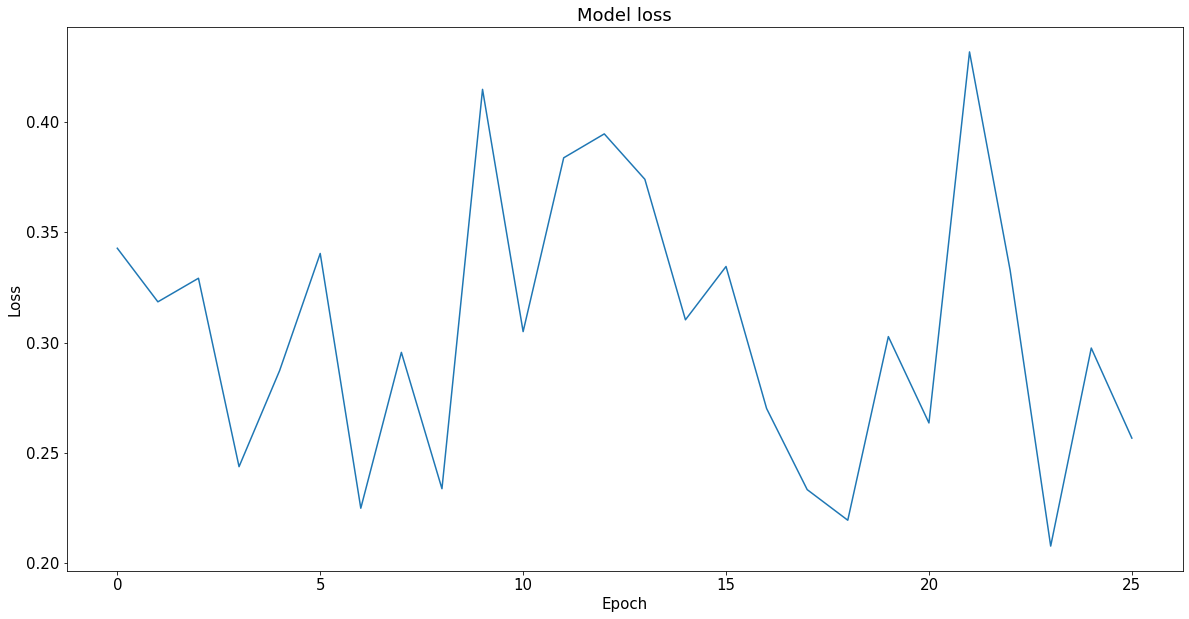

In [36]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.plot(loss_list)
#plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'], loc='upper left')
#plt.savefig('Images/LSTM_Accuracy_Loss.png')